<a href="https://colab.research.google.com/github/strejo4/ColabFiles_UACJ_PADP/blob/main/Practica23_SergioTrejo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Práctica #23: Regresión Ridge y Lasso


## Datos del Estudiante

*   Apellidos y Nombre: Sergio Trejo
*   Matrícula: 261539
* Enlace Repositorio Github: https://github.com/strejo4/ColabFiles_UACJ_PADP/blob/main/Practica23_SergioTrejo.ipynb



In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Instrucciones y Objetivos para la Práctica: Regresión Lasso y Ridge**

#### **📌 Objetivos de la Práctica:**  
Al finalizar esta práctica, los estudiantes serán capaces de:  
1. **Realizar un Análisis Exploratorio de Datos (EDA)** completo, incluyendo visualización de distribuciones, detección de outliers y análisis de correlaciones.  
2. **Preprocesar datos** correctamente, manejando valores faltantes, codificando variables categóricas y escalando características.  
3. **Implementar modelos de regresión Lasso y Ridge**, entendiendo cómo la regularización afecta los coeficientes.  
4. **Verificar los supuestos de la regresión lineal** (linealidad, normalidad de residuos, homocedasticidad y multicolinealidad).  
5. **Comparar el rendimiento** de ambos modelos y analizar qué variables son más relevantes en cada caso.  

---

### **📋 Instrucciones**  

#### **🔹 Paso 1: Configuración Inicial**
✅ Carga el set de datos que puedes encontrar en el campus virtual
✅ Ejecutar las celdas de importación de librerías y carga del dataset.  
✅ Familiarizarse con los datos usando `.head()`, `.info()` y `.describe()`.  

#### **🔹 Paso 2: Análisis Exploratorio (EDA)**  
📊 **Para variables numéricas:**  
- Generar histogramas y boxplots para identificar distribuciones y outliers.  
- Calcular medidas de tendencia central y dispersión.  

📊 **Para variables categóricas:**  
- Usar gráficos de barras para visualizar frecuencias.    

#### **🔹 Paso 3: Matriz de Correlación**  
✅ Calcular la matriz de correlación **solo para variables numéricas**.  
✅ Generar un **mapa de calor** para visualizar relaciones.  
📌 **Pregunta:** ¿Qué variables están más correlacionadas con el target (`charges`)? (salida del dataset)  

#### **🔹 Paso 4: Preprocesamiento**  
🔧 **Tareas:**  
1. Manejar valores faltantes con `SimpleImputer`.  
2. Codificar variables categóricas con `OneHotEncoder`.  
3. Estandarizar variables numéricas con `StandardScaler`.  
✅ Verificar que el dataset transformado no tenga valores nulos.  

#### **🔹 Paso 5: Modelado (Lasso y Ridge)**  
🎯 **Para cada modelo:**  
1. Ajustar el modelo con los hiperparámetros dados (`alpha=0.1` para Lasso, `alpha=1.0` para Ridge).  
2. Calcular **MSE** y **R²** para evaluar rendimiento.  
3. Analizar los coeficientes para identificar variables importantes.  

📌 **Pregunta:**  
- ¿Qué modelo tiene un mejor R²? ¿Por qué crees que ocurre esto?  
- ¿Qué variables tienen coeficientes cercanos a cero en Lasso? ¿Por qué?  

#### **🔹 Paso 6: Verificación de Supuestos**  
📉 **Para cada modelo, verificar:**  
1. **Linealidad** (gráfico de residuos vs predicciones).  
2. **Normalidad de residuos** (QQ-Plot y test de Shapiro-Wilk).  
3. **Homocedasticidad**
4. **Multicolinealidad** (VIF > 10 indica problema).  

📌 **Pregunta:**  
- ¿Se cumplen los supuestos en ambos modelos?  
- Si hay heterocedasticidad, ¿cómo podría solucionarse?  

#### **🔹 Paso 7: Comparación Final**  
📊 **Analizar:**  
- ¿Qué modelo es más interpretable?  
- ¿Cuál reduce mejor el sobreajuste?  
- ¿Qué variables son más importantes en cada caso?  

---

### **📌 Entrega de la Práctica**  
Al finalizar la practica, incluye un texto con los siguientes elementos
- Incluir **comentarios explicativos** en cada paso.  
- Responder las **preguntas planteadas** en celdas Markdown.  

🎯 **Criterios de Evaluación:**  
✔ **Correcto preprocesamiento** (manejo de nulos, escalado, encoding).  
✔ **Análisis visual y estadístico** (gráficos claros, interpretación de resultados).  
✔ **Validación de supuestos** (justificación de si se cumplen o no).  
✔ **Comparación crítica** entre Lasso y Ridge.  

## Paso 1: Configuración Inicial
* Carga el set de datos que puedes encontrar en el campus virtual
* Ejecutar las celdas de importación de librerías y carga del dataset.
* Familiarizarse con los datos usando .head(), .info() y .describe().

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Librerias de modelos y procesamiento
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Carga del dataset
df = pd.read_csv('/content/drive/MyDrive/ClassFiles/insurance.csv')

#Revision incicial del dataset
print("\nDimensiones del dataset: ", df.shape)
print("\nPrimeras 5 filas del dataset:\n")
print(df.head())
print("\nTipos de datos del dataset:\n")
print(df.info())
print("\nDescripción estadística del dataset:\n")
print(df.describe())



Dimensiones del dataset:  (1338, 7)

Primeras 5 filas del dataset:

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Tipos de datos del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ 

**Interpretacion**

* El dataset tiene 1338 registros y 7 columnas.

* No hay valores nulos y las variables estan bien definidas.

* Los costos medicos en la variable "charges" varian mucho entre personas. Factores como la edad, bmi, si la perona fuma o no puede influir en estos costos.

#### **🔹 Paso 2: Análisis Exploratorio (EDA)**  
**Para variables numéricas:**  
- Generar histogramas y boxplots para identificar distribuciones y outliers.  
- Calcular medidas de tendencia central y dispersión.  

**Para variables categóricas:**  
- Usar gráficos de barras para visualizar frecuencias.    

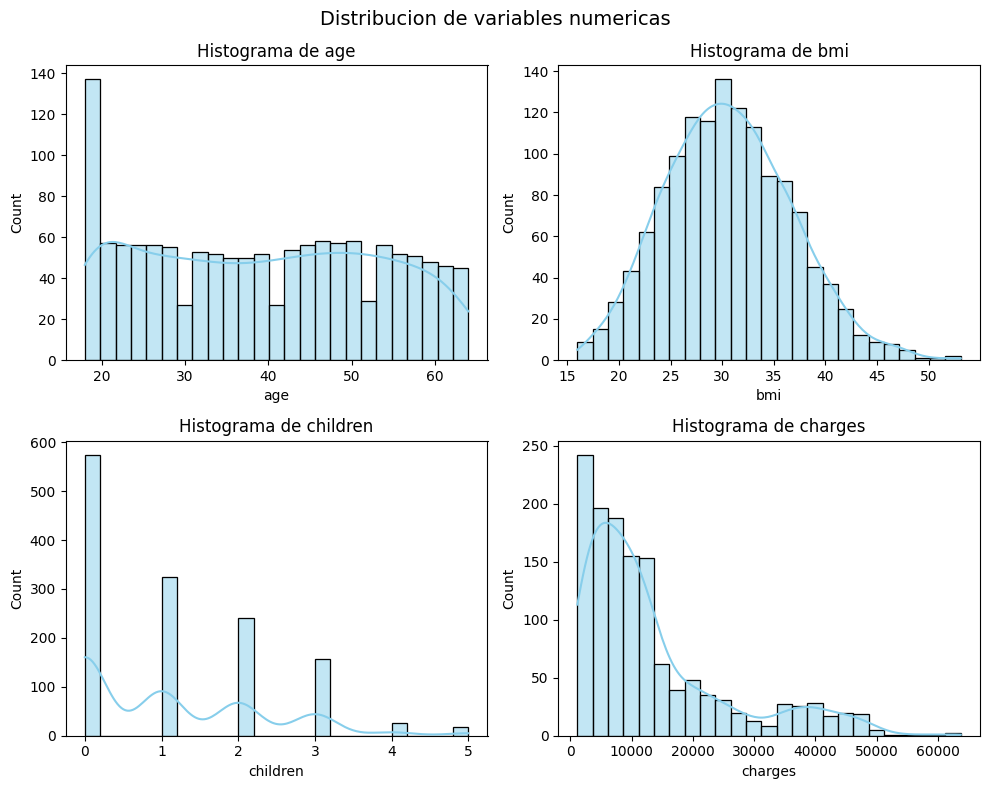

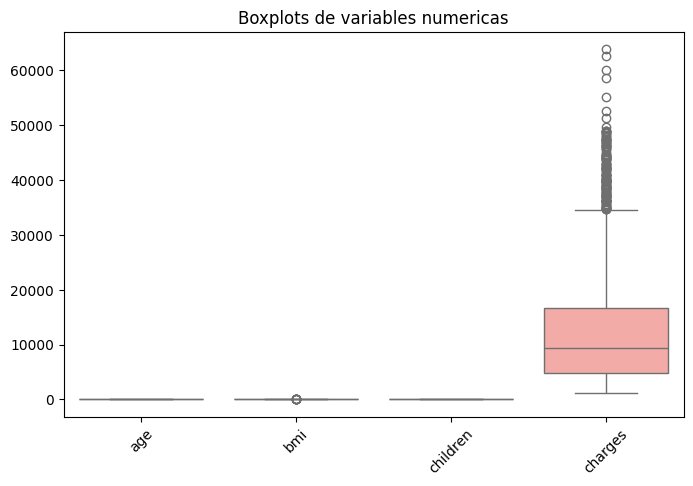


Medidas de tendencia y dispersion: 
              age        bmi  children       charges
mean    39.207025  30.663397  1.094918  13270.422265
median  39.000000  30.400000  1.000000   9382.033000
std     14.049960   6.098187  1.205493  12110.011237
min     18.000000  15.960000  0.000000   1121.873900
max     64.000000  53.130000  5.000000  63770.428010


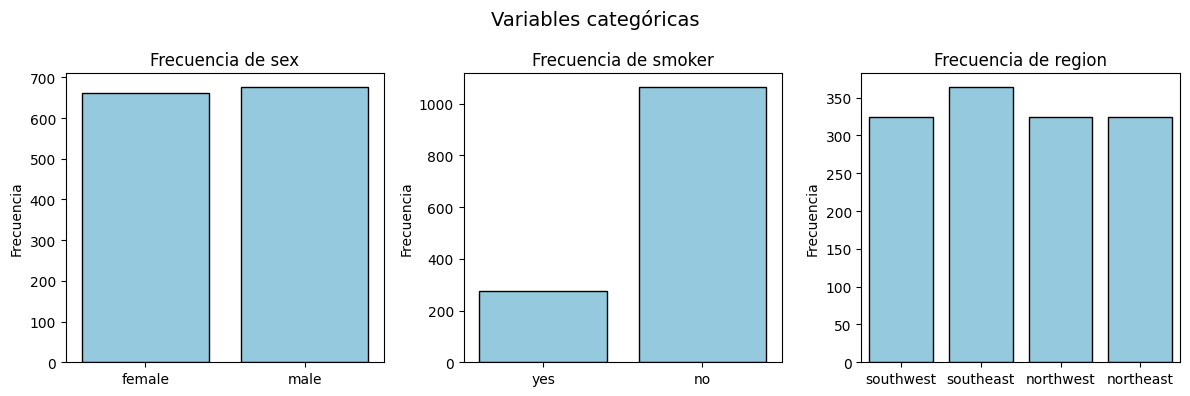

In [9]:
#Para las variables numericas generar histogramas y boxplots para identificar distribuciones y outliers
#Histograma para la distribucion de variables numericas
num_cols = ['age','bmi', 'children','charges']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(bins=25,color='skyblue',edgecolor='black', data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Histograma de {col}')

plt.suptitle('Distribucion de variables numericas',fontsize=14)
plt.tight_layout()
plt.show()

#box plots para identificar outliers
plt.figure(figsize=(8,5))
sns.boxplot(data=df[num_cols],palette='pastel')
plt.title('Boxplots de variables numericas')
plt.xticks(rotation=45)
plt.show()

#tendencias central y dispersion
tendencias = df[num_cols].agg(['mean','median','std','min','max'])
print("\nMedidas de tendencia y dispersion: ")
print(tendencias)

#Usar gráficos de barras para visualizar frecuencias para las variables categoricas
cat_cols = ['sex','smoker','region']

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df, color='skyblue', edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Frecuencia de {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frecuencia')

plt.suptitle('Variables categóricas', fontsize=14)
plt.tight_layout()
plt.show()


**Interpretacion**

* Las variables numericas muestran diferentes comportamientos, por ejemplo las variables "age" y "bmi" tienen una distribucion al parecer normal, mientras que la variables "charges" esta muy sesgada hacia la derecha, lo que indica que pocas personas generan gastos medicos muy altos.

* Los boxplots confirman la presencia de outliers, sobre todo en la variables "charges" que es la que representa los pacientes con costos fuera del promedio.

* Las medidas de tendencia central indican que la edad promedi es de alrededor de 39 años y el "bmi" promedio es cercano a 30, lo que sugiere una poblacion con sobrepeso.


* En las variables categoricas se observa una ligera mayoria de hombres y que la region southwast es la mas comun, aunque las demas regiones estan bien representadas. La varibale "smoker" si esta desbalanceada, con una mayoria clara de personas fumadoras.

#### **🔹 Paso 3: Matriz de Correlación**  
* Calcular la matriz de correlación **solo para variables numéricas**.  
* Generar un **mapa de calor** para visualizar relaciones.  
* **Pregunta:** ¿Qué variables están más correlacionadas con el target (`charges`)? (salida del dataset)


Matriz de correlacion: 
               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


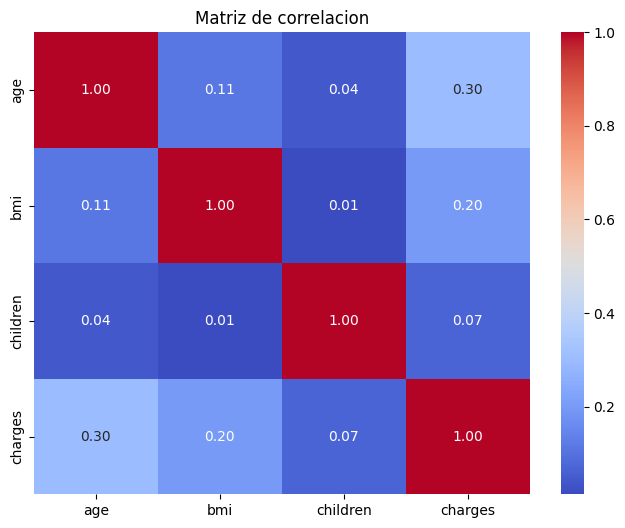

In [10]:
#Matrix de correlacion para las variables numericas (heatmap)
num_cols = ['age','bmi', 'children','charges']

corr_matrix = df[num_cols].corr()
print("\nMatriz de correlacion: ")
print(corr_matrix)

#Mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlacion')
plt.show()

**Interpretacion**

* La matriz de correlacion muestra que las relacion lineal entre variables no es extremadamente fuerte. Sin embargo las variable objetivo "charge" esta mas relacionada con variables como "age" y "bmi"

* ¿Qué variables están más correlacionadas con el target (`charges`)? (salida del dataset)
  * "age" y "bmi" indican que a mayor edad y mayor indice de masa corporal tienden a aumentar los costos medicos.

#### **🔹 Paso 4: Preprocesamiento**  
 **Tareas:**  
1. Manejar valores faltantes con `SimpleImputer`.  
2. Codificar variables categóricas con `OneHotEncoder`.  
3. Estandarizar variables numéricas con `StandardScaler`.  
**Verificar que el dataset transformado no tenga valores nulos.**

In [11]:
#Manejar valores faltantes con SimpleImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
#Separamos variables numericas y categoricas en dos variables
num_cols = ['age','bmi', 'children']
cat_cols = ['sex','smoker','region']

#Imputacion, escalas y codificacion
num_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),('scaler',StandardScaler())])
cat_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),('encoder',OneHotEncoder(drop='first'))])

#Combinar ambos transformadores
preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_cols), ('cat', cat_transformer, cat_cols)])

#Aplicar el preprocesamiento al dataset
X = df.drop('charges', axis=1)  # Variables predictoras
y = df['charges']               # Variable objetivo

X_preprocessed = preprocessor.fit_transform(X)

print("¿Hay valores nulos después del preprocesamiento?:", np.isnan(X_preprocessed).any())
print("Forma del dataset transformado:", X_preprocessed.shape)


¿Hay valores nulos después del preprocesamiento?: False
Forma del dataset transformado: (1338, 8)


**Interpretacion**

* Al inicio durante exploracion de los datos se observo que no habia valores nulos, sin embargo es buena practica como verificacion.

* Las variables numericas "age", "bmi", "children" se estandarizaron para tener la misma escala, mientras que las categóricas "sex", "smoker", "region" se transformaron en variables dummy con OneHotEncoder.

* Esto deja los datos listos para entrenar los modelos de regresion Lasso y Ridge sin sesgos por diferencias de magnitud o tipo de variable.

#### **🔹 Paso 5: Modelado (Lasso y Ridge)**  
 **Para cada modelo:**  
1. Ajustar el modelo con los hiperparámetros dados (`alpha=0.1` para Lasso, `alpha=1.0` para Ridge).  
2. Calcular **MSE** y **R²** para evaluar rendimiento.  
3. Analizar los coeficientes para identificar variables importantes.  

 **Pregunta:**  
- ¿Qué modelo tiene un mejor R²? ¿Por qué crees que ocurre esto?  
- ¿Qué variables tienen coeficientes cercanos a cero en Lasso? ¿Por qué?

Resultados modelo Lasso:
MSE:,  36501893.68
R^2:,  0.7509

Coeficientes Lasso:
age                  3607.401538
bmi                  2067.477362
children              572.886518
sex_male             -130.858174
smoker_yes          23847.874359
region_northwest     -351.296712
region_southeast    -1033.232029
region_southwest     -958.345589
dtype: float64


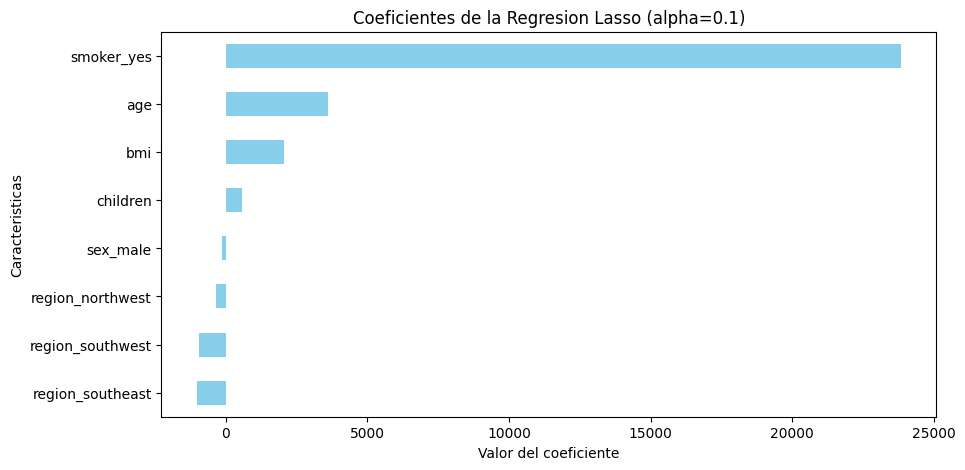


Resultados modelo Ridge:
MSE:,  36503887.63
R^2:,  0.7509

Coeficientes del modelo de Ridge:
age                  3604.096982
bmi                  2064.858647
children              573.073125
sex_male             -124.200613
smoker_yes          23737.991359
region_northwest     -347.825073
region_southeast    -1018.540799
region_southwest     -952.384021
dtype: float64


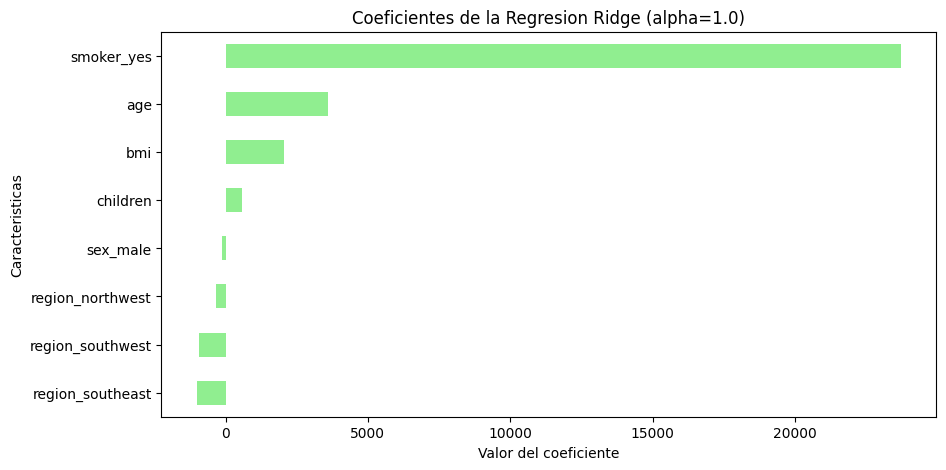

In [21]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

#Separar variables predictoras "X" y la variable objetivo "y"
X = df.drop('charges', axis=1)
y = df['charges']

#Ajustar el modelo con los hiperparametros dados alpha=0.1 para Lasso
lasso = Pipeline([('preprocessor', preprocessor),('lasso',Lasso(alpha=0.1))])

lasso.fit(X,y) #el modelo se ajusta a a los datos

#Calcula MSE y R^2 para evaluar rendimiento del modelo lasso
y_pred_lasso = lasso.predict(X)
mse_lasso = mean_squared_error(y, y_pred_lasso)
r2_lasso = r2_score(y, y_pred_lasso)

print("Resultados modelo Lasso:")
print(f"MSE:, {mse_lasso: .2f}")
print(f"R^2:, {r2_lasso: .4f}")

#Analizar los coeficientes para identificar variables importantes.
feature_names = (num_cols + list(lasso.named_steps['preprocessor'].named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(cat_cols)))

coef_lasso = pd.Series(lasso.named_steps['lasso'].coef_,index=feature_names)
print("\nCoeficientes Lasso:")
print(coef_lasso)

#Graficar  los coeficientes  de la regresion de lasso
plt.figure(figsize=(10, 5))
coef_lasso.sort_values().plot(kind="barh", color="skyblue")
plt.title(f"Coeficientes de la Regresion Lasso (alpha=0.1)")
plt.xlabel("Valor del coeficiente")
plt.ylabel("Caracteristicas")
plt.show()


#Ajusta el modelo con los hiperparametros dados alpha=1.0 para Ridge
ridge = Pipeline([('preprocessor', preprocessor),('ridge',Ridge(alpha=1.0))])
ridge.fit(X,y)

#Calcular MSE y r2 para evaluar el rendiminto del modelo de ridge
y_pred_ridge = ridge.predict(X)
mse_ridge = mean_squared_error(y, y_pred_ridge)
r2_ridge = r2_score(y, y_pred_ridge)

print("\nResultados modelo Ridge:")
print(f"MSE:, {mse_ridge: .2f}")
print(f"R^2:, {r2_ridge: .4f}")

#Analizar los coeficientes para identificar variables importantes.
coef_ridge = pd.Series(ridge.named_steps['ridge'].coef_, index=feature_names)
print("\nCoeficientes del modelo de Ridge:")
print(coef_ridge)

#Graficar  los coeficientes  de la regresion de ridge
plt.figure(figsize=(10, 5))
coef_ridge.sort_values().plot(kind="barh", color="lightgreen")
plt.title(f"Coeficientes de la Regresion Ridge (alpha=1.0)")
plt.xlabel("Valor del coeficiente")
plt.ylabel("Caracteristicas")
plt.show()

**Interpretacion**

**Pregunta:**

* ¿Qué modelo tiene un mejor R²? ¿Por qué crees que ocurre esto?\
  * Ambos modelos, Lasso y Ridge obtuvieron resultados similares para r2, lo que indica que explican alrededor del 75% de la variacion en los costos medicos.
  * Esto ocurre porque las variables con mayor influencia "age", "bmi" y "smoker_yes" ya explican gran parte del comportamiento de "charges", mientras que las demas variables aportan poca informacion.
  * Como el dataset es pequeño y no presenta multicolinealidad fuerte, la regularizacion no genera diferencias notables en el desempeno entre ambos modelos.

* ¿Qué variables tienen  cercanos a cero en Lasso? ¿Por qué?

  * El modelo de Lasso, ninguna variable llego exactamente a cero porque la penalizacion usada "alpha"=0.1 es leve. Sin embargo, variables como "sex_male" y las regiones tienen coeficientes mucho menores, lo que confirma que su relacion con los costos medicos es debil. Lasso mantiene las variables mas relevantes "smoker_yes", "age" y "bmi", que son las que explican la mayor parte de la variacion en los gastos medicos.

## Paso 6: Verificación de Supuestos
Para cada modelo, verificar:

Linealidad (gráfico de residuos vs predicciones).
Normalidad de residuos (QQ-Plot y test de Shapiro-Wilk).
Homocedasticidad
Multicolinealidad (VIF > 10 indica problema).

Pregunta:

* ¿Se cumplen los supuestos en ambos modelos?
* Si hay heterocedasticidad, ¿cómo podría solucionarse?

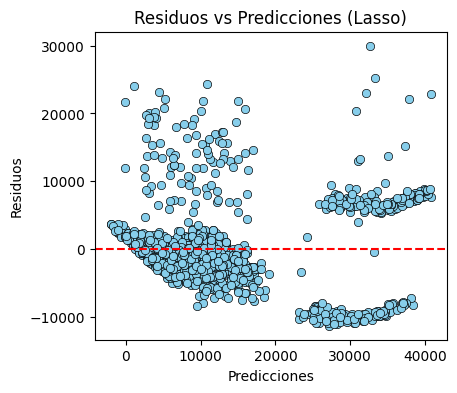

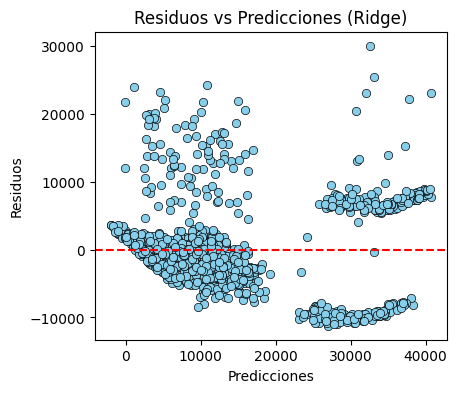

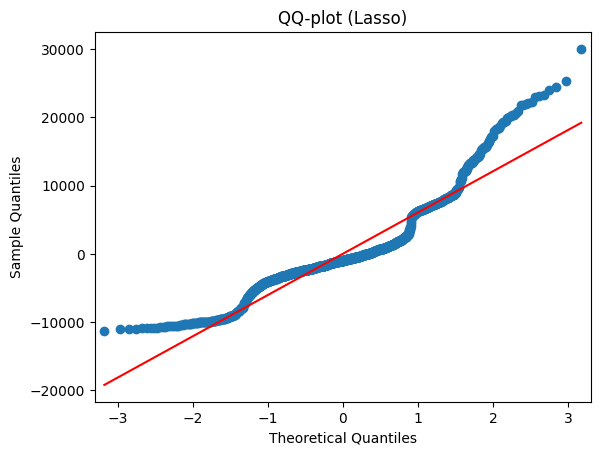

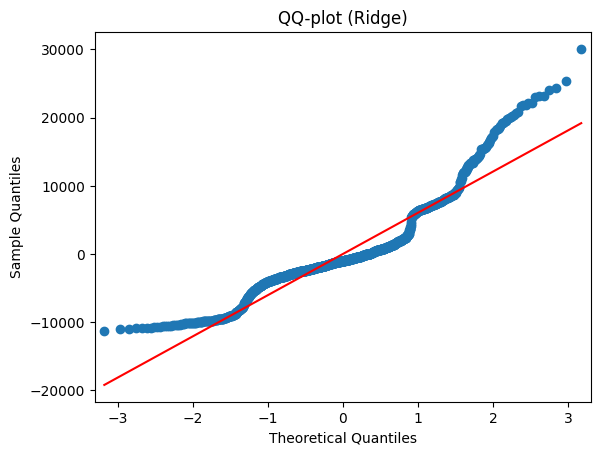

Test de normalidad de Shapiro-Wilk:
Lasso: Statistic=0.8989, p-value=0.0000
Ridge: Statistic=0.8980, p-value=0.0000

Valores VIF: 
[np.float64(1.015843187096966), np.float64(1.0886725109731084), np.float64(1.0033475449092797), np.float64(1.6748298500388008), np.float64(1.2280748199782276), np.float64(1.223453276638753), np.float64(1.3574188985359077), np.float64(1.21568644859172)]


In [18]:
#Calcular los residuos de cada modelo
residuals_lasso = y - y_pred_lasso
residuals_ridge = y - y_pred_ridge

#Grafico de residuos vs predicciones
#Lasso
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.scatterplot(x=y_pred_lasso, y=residuals_lasso, color='skyblue',edgecolor='black')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Residuos vs Predicciones (Lasso)')
plt.show()

#Ridge
plt.figure(figsize=(10,4))
plt.subplot(1,2,2)
sns.scatterplot(x=y_pred_ridge, y=residuals_ridge, color='skyblue',edgecolor='black')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Residuos vs Predicciones (Ridge)')
plt.show()

#Normalidad de residuos (QQ-Plot y test de Shapiro-Wilk).
import scipy.stats as stats
import statsmodels.api as sm
#QQ-plot
sm.qqplot(residuals_lasso, line='s')
plt.title('QQ-plot (Lasso)')
plt.show()

sm.qqplot(residuals_ridge, line='s')
plt.title('QQ-plot (Ridge)')
plt.show()

#Shapiro-wilk test
shapiro_lasso = stats.shapiro(residuals_lasso)
shapiro_ridge = stats.shapiro(residuals_ridge)

print("Test de normalidad de Shapiro-Wilk:")
print(f"Lasso: Statistic={shapiro_lasso[0]:.4f}, p-value={shapiro_lasso[1]:.4f}")
print(f"Ridge: Statistic={shapiro_ridge[0]:.4f}, p-value={shapiro_ridge[1]:.4f}")

#Homocedasticidad Multicolinealidad (VIF > 10 indica problema)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder, StandardScaler

X_encoded = pd.DataFrame(preprocessor.fit_transform(X))
vif = [variance_inflation_factor(X_encoded.values, i) for i in range(X_encoded.shape[1])]
print("\nValores VIF: ")
print(vif)

**Interpretacion**

* ¿Se cumplen los supuestos en ambos modelos?
 * Los modelos cumplen los supuestos de manera parcial, aunque no de forma completa. Los residuos muestran un podco de heterocedasticidad y no tiene completamente una distribucion normal, La relacion lineal principal entre las variables y la variable objetivo "charges" se mantiene estable y el modelo ajusta bien los datos.
* Si hay heterocedasticidad, ¿cómo podría solucionarse?

 * La heterocedasticidad se podria corregir aplicando una transformacion tal vez logaritmica a la variable "charges", esto ayuda a estabilzar la varianza de los residuos. Otra opcion seria utilizar modelos mas robustos como Random Forest que manja mejor este tipo de variaciones.

## Paso 7: Comparación Final

**Analizar:**

* ¿Qué modelo es más interpretable?
  * En esta practica ambos modelos generaron coeficientes muy similares, por lo que la interpretabilidad es practicamente la misma en este caso. En teoria, Lasso tiende a ser mas visual por que indica puede reducir las variables a 0 cuando son menos relevantes. En este caso el valor de alpha fue bajo lo que arroja que todas las variables aporten aproximandamente la misma informacion.
* ¿Cuál reduce mejor el sobreajuste?
  * Ambos modelos en este caso reducen el sobreajuste de manera similar ya que tienen casi el mismo r2, y un comportamiento casi identico en los residuos.
  * En teoria, el modelo de Ridge es un poco mas eficaz para controlar el sobreajuste porque distirbuye la penalizacion entre todos los coeficientes sin eliminar variables, lo que lo hace mas estable cuando existen bastantes variables.
* ¿Qué variables son más importantes en cada caso?
  * Las variables mas importantes son aquellas "smoker", "age" y "bmi", ya que tienen los coeficientes mas altos y positivos. Esto significa que ser fumador, tener mayor edad y tener un bmi alto, incrementa los costos de aseguranza medica.